In [1]:
 pip install keras --user

Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=100,
                n_features=10,
                n_informative=6,
                noise=8,random_state=21)

In [59]:
import pandas as pd
X  = pd.DataFrame(X,columns=["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"])
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.275170,1.637889,2.404714,-0.384765,1.782806,0.957342,-0.439692,1.741348,-1.240036,-0.546595
1,-0.926864,2.602813,0.210207,-1.983278,-0.693936,1.902740,-1.181434,0.376703,-0.129489,-0.368830
2,-1.006109,-0.311900,0.031493,-0.567888,-0.504862,-0.951802,0.327697,-1.023453,-0.996825,-0.352213
3,0.753899,-0.463593,-2.307581,-0.035329,0.012032,-1.074575,1.078478,1.380974,0.620528,-2.260315
4,-0.526516,2.519898,0.434308,0.570438,2.010793,-1.509082,0.285046,2.755003,-0.257867,-1.404590
...,...,...,...,...,...,...,...,...,...,...
95,-1.427289,0.758555,0.573830,0.335132,-0.361722,-0.882418,-0.217384,0.319751,-0.046958,-0.999412
96,-2.377465,-0.354489,-0.422632,0.141293,0.694067,1.302656,-0.285462,0.740013,-0.095867,-0.313218
97,-0.905639,-0.831998,-0.000267,-0.016413,-2.475892,-1.202989,0.937747,-0.608521,1.101853,0.048616
98,1.625891,-0.251844,-0.609316,0.047495,-0.574218,-0.369358,0.725413,-1.153061,-0.426582,-0.402654


In [60]:
Y = pd.DataFrame(Y,columns=["Target"])
Y

,Target
0,138.740209
1,35.002216
2,-138.793777
3,-5.795828
4,47.044816
...,...
95,-51.194867
96,76.566402
97,13.270319
98,-91.348628


In [61]:
X.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [62]:
Y.isna().sum()

Target    0
dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

In [64]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain),columns = xtrain.columns)
xtest = pd.DataFrame(ss.transform(xtest),columns = xtest.columns)

In [65]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
model =  Sequential()
model.add(Dense(64,input_dim =xtrain.shape[1],activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="linear"))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                704       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(loss="mae",optimizer = "adam")

In [69]:
hist = model.fit(xtrain,ytrain,validation_split = 0.2,epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 164ms/step - loss: 91.6652 - val_loss: 81.3147
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 91.6339 - val_loss: 81.3042
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 91.6051 - val_loss: 81.2930
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 91.5757 - val_loss: 81.2813
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 91.5460 - val_loss: 81.2695
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 91.5172 - val_loss: 81.2559
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 91.4858 - val_loss: 81.2427
Epoch 8/100
2/2 [==============================] - 0s 34ms/step - loss: 91.4537 - val_loss: 81.2285
Epoch 9/100
2/2 [==============================] - 0s 36ms/step - loss: 91.4224 - val_loss: 81.2125
Epoch 10/100
2/2 [==============================] - 0s 35ms/step - loss: 91.3879 - val_loss: 81.196

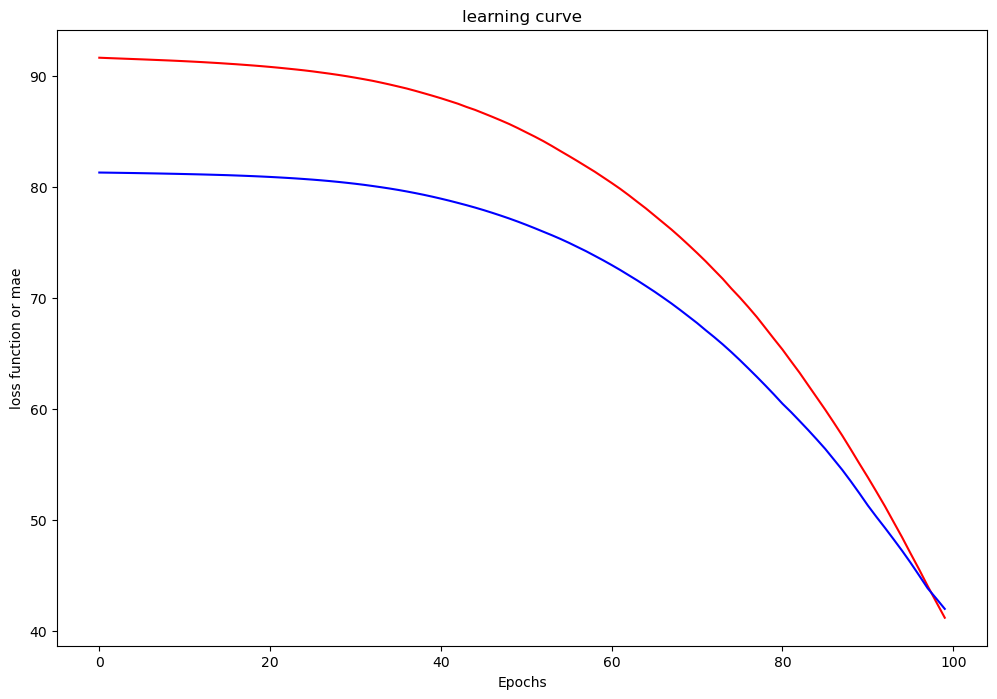

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history["loss"],c="red")
plt.plot(hist.history["val_loss"],c="blue")
plt.xlabel("Epochs")
plt.ylabel("loss function or mae")
plt.title("learning curve")
plt.show()


In [71]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

1/1 [==============================] - 0s 22ms/step


In [72]:
model.evaluate(xtrain,ytrain)

3/3 [==============================] - 0s 3ms/step - loss: 40.4824


40.4824333190918

In [73]:
model.evaluate(xtest,ytest)

1/1 [==============================] - 0s 27ms/step - loss: 50.0140


50.014041900634766

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
tr_mae =mean_absolute_error(ytrain,tr_pred)
tr_mse =mean_squared_error(ytrain,tr_pred)
print("training_mae:",round(tr_mae,2))
print("training_mse:" ,round(tr_mse,2))

training_mae: 40.48
training_mse: 2952.69


In [75]:
#Testing 
ts_mae =mean_absolute_error(ytest,ts_pred)
ts_mse =mean_squared_error(ytest,ts_pred)
print("testing_mae:",round(ts_mae,2))
print("testing_mse:" ,round(ts_mse,2))

testing_mae: 50.01
testing_mse: 4716.16


In [76]:
from sklearn.datasets import make_classification
X,Y = make_classification(n_samples=1000, #Total number of rows
                    n_features = 10, # Number of columns
                    n_classes = 2, # Number of Target Classes
                    n_informative = 5 , # Number of Informative classes
                    random_state=42) # Random State )

In [77]:
X

array([[ 1.12510039,  1.17812384,  0.49351604, ...,  1.35732466,
         0.9660408 , -1.98113862],
       [-0.56464086,  3.6386291 , -1.52241469, ..., -0.89025442,
         1.43882638, -3.82874758],
       [ 0.51631285,  2.16542633, -0.62848571, ..., -1.95817543,
        -0.34880315, -1.8041241 ],
       ...,
       [ 1.65015307, -0.69216458, -2.04920577, ..., -1.30257748,
        -1.28550452,  3.32856934],
       [-1.18660302, -1.41459786, -0.12151968, ..., -1.42146469,
        -0.02833985,  3.41393228],
       [ 0.78867591, -0.22254747,  0.32856985, ..., -1.29103957,
        -2.33817245,  2.03602059]])

In [78]:
Y

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,

In [79]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
features = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
X = pd.DataFrame(X,columns=features)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610


In [80]:
Y = pd.DataFrame(Y,columns=["Target"])
Y.head()

,Target
0,1
1,0
2,0
3,1
4,0


In [81]:
X.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [82]:
Y.isna().sum()

Target    0
dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

In [85]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [86]:
model = Sequential()
model.add(Dense(128,input_dim=xtrain.shape[1],activation='relu'))
model.add(Dropout(0.5))   
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [88]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [89]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 0.7297 - accuracy: 0.5286 - val_loss: 0.6524 - val_accuracy: 0.6643
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.5500 - val_loss: 0.6314 - val_accuracy: 0.7000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.6304 - val_loss: 0.5989 - val_accuracy: 0.7857
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6081 - accuracy: 0.6661 - val_loss: 0.5546 - val_accuracy: 0.8286
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5555 - accuracy: 0.7125 - val_loss: 0.5023 - val_accuracy: 0.8286
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5193 - accuracy: 0.7500 - val_loss: 0.4484 - val_accuracy: 0.8429
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4763 - accuracy: 0.7946 - val_loss: 0.4031 - val_accuracy: 0.8286
Epoch 8/100


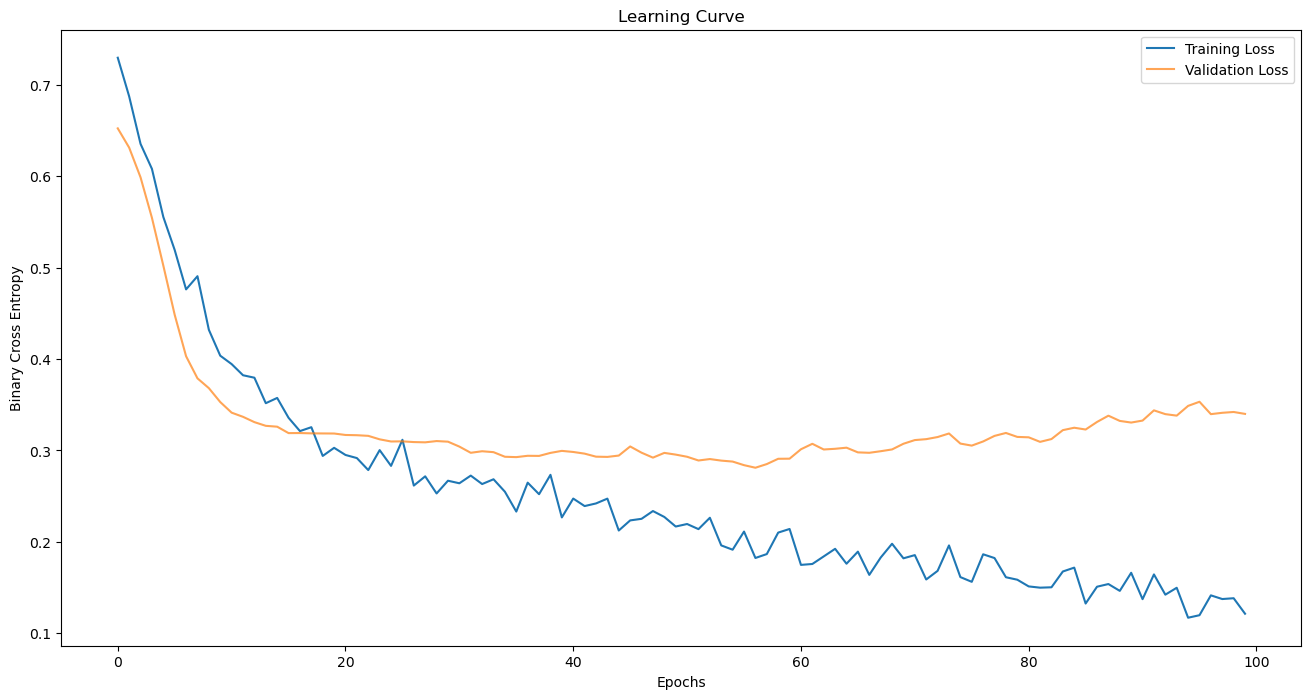

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss',alpha=0.7)
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [91]:
model.evaluate(xtrain,ytrain)

22/22 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9700


[0.12610653042793274, 0.9700000286102295]

In [92]:
model.evaluate(xtest,ytest)

10/10 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9500


[0.10494414716959, 0.949999988079071]

In [93]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

10/10 [==============================] - 0s 1ms/step


In [94]:
threshold = 0.5
tr_pred_class = []
for i in tr_pred:
    if(i>=0.5):
        tr_pred_class.append(1)
    else:
        tr_pred_class.append(0)

In [95]:
tr_pred_class[0:5]

[1, 0, 1, 0, 1]

In [96]:
tr_pred[0:5]

array([[1.0000000e+00],
       [3.1548279e-06],
       [9.9996632e-01],
       [5.0448445e-03],
       [9.9999988e-01]], dtype=float32)

In [109]:
threshold = 0.5
ts_pred_class = []
for i in ts_pred:
    if(i>=0.5):
        ts_pred_class.append(1)
    else:
        ts_pred_class.append(0)

In [110]:
ts_pred_class[0:5]

[0, 1, 0, 0, 0]

In [111]:
ts_pred[0:5]

array([[1.1880776e-03],
       [9.9971920e-01],
       [1.4060096e-02],
       [6.5089932e-07],
       [1.1015256e-01]], dtype=float32)

In [112]:
from sklearn.metrics import roc_auc_score
ts_acc = roc_auc_score(ytrain,tr_pred)
tr_acc = roc_auc_score(ytest,ts_pred)
tr_acc,ts_acc

(0.9926457479051524, 0.993630443131583)

In [116]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_pred_class)
cf

array([[151,   7],
       [  8, 134]], dtype=int64)

<Axes: >

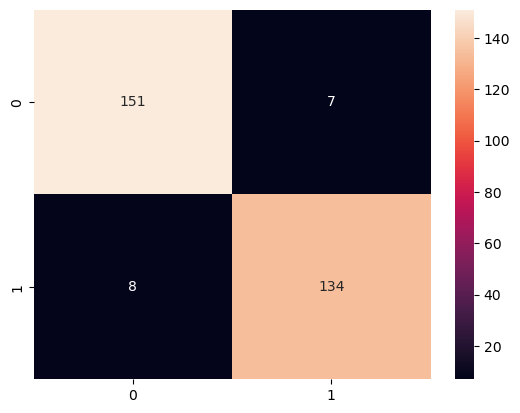

In [118]:
import seaborn as sb
sb.heatmap(cf,annot=True,fmt="d")

In [120]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       158
           1       0.95      0.94      0.95       142

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [121]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000,
                           n_features=15,
                           n_informative=12,
                           n_classes=3,
                           random_state=21)

In [122]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
features = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10',"x11","x12","x13","x14","x15"]
X = pd.DataFrame(X,columns=features)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,-0.038649,-6.128380,-1.975332,-3.349479,-1.842790,2.588859,-1.759425,-1.251231,-0.043914,-1.036508,-1.007567,1.469563,2.779833,-0.512789,-2.646432
1,1.054561,2.800112,0.383094,0.751510,-3.288005,-1.905142,1.837014,2.805468,-1.093106,-0.042542,1.143440,-0.912809,2.087458,0.232091,0.987047
2,0.531563,1.937161,-1.240814,-0.013826,1.590909,-4.051046,3.292370,0.466506,-1.865563,1.909655,-0.018490,1.629226,-0.258149,1.199167,-3.108431
3,-0.619250,-0.505557,5.961385,0.417560,-2.218507,1.383474,0.804475,0.348618,0.986619,3.541292,0.130104,-1.422179,2.087419,0.039672,-3.410622
4,1.665690,4.782543,6.796794,0.018288,1.407890,-2.268434,-0.234060,-2.391380,-4.121123,3.143179,1.154359,-2.917756,-0.022196,-3.079381,3.668867


In [123]:
from keras.utils import to_categorical
Y = to_categorical(Y)
Y

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [124]:
X.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [127]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [128]:
model = Sequential()
model.add(Dense(64,input_dim=xtrain.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [129]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [130]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                1024      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3203 (12.51 KB)
Trainable params: 3203 (12.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=200,callbacks=[early_stop], batch_size=64)

Epoch 1/200
10/10 [==============================] - 1s 27ms/step - loss: 1.1353 - accuracy: 0.3313 - val_loss: 1.0591 - val_accuracy: 0.4125
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 1.0405 - accuracy: 0.4469 - val_loss: 1.0083 - val_accuracy: 0.5063
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9827 - accuracy: 0.5125 - val_loss: 0.9625 - val_accuracy: 0.5188
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 0.9208 - accuracy: 0.5813 - val_loss: 0.9135 - val_accuracy: 0.5813
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.8772 - accuracy: 0.6187 - val_loss: 0.8706 - val_accuracy: 0.6250
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.8270 - accuracy: 0.6609 - val_loss: 0.8318 - val_accuracy: 0.6250
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 0.7964 - accuracy: 0.6734 - val_loss: 0.7940 - val_accuracy: 0.6625
Epoch 8/200


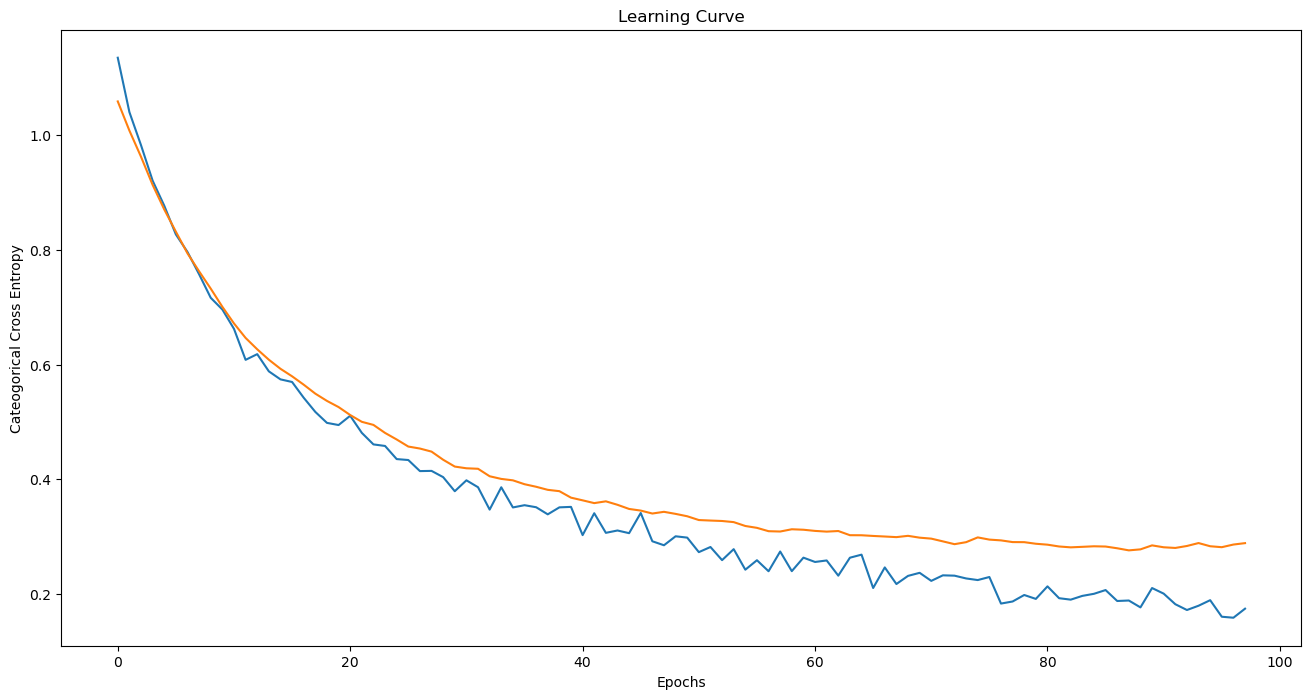

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Cateogorical Cross Entropy')
plt.show()

In [134]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9613


[0.13000355660915375, 0.9612500071525574]

In [135]:
model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9200


[0.2607022523880005, 0.9200000166893005]

In [136]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

7/7 [==============================] - 0s 1ms/step


In [137]:
import numpy as np
ts_pred_classes = np.argmax(ts_pred, axis=-1)
ts_pred_classes

array([0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2,
       2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0,
       1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       0, 1], dtype=int64)

In [138]:
ytest_classes = np.argmax(ytest,axis=1)
ytest_classes

array([0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1,
       1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2,
       0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0,
       1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0,
       1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       0, 1], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest_classes, ts_pred_classes)

0.92

In [140]:
cf =  confusion_matrix(ytest_classes, ts_pred_classes)
cf

array([[62,  3,  2],
       [ 1, 60,  3],
       [ 4,  3, 62]], dtype=int64)

<Axes: >

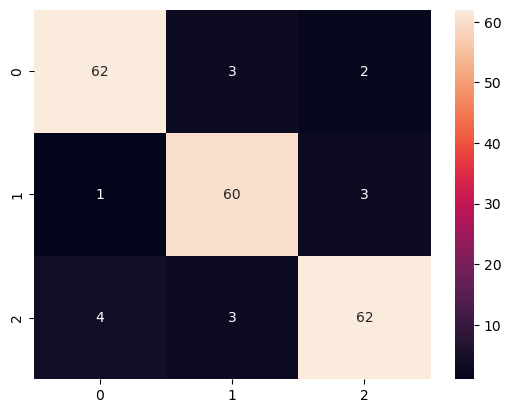

In [141]:
sb.heatmap(cf,annot=True,fmt="d")

In [142]:
from sklearn.metrics import classification_report
print(classification_report(ytest_classes,ts_pred_classes))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.91      0.94      0.92        64
           2       0.93      0.90      0.91        69

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

